#1 鸢尾花的决策树分类实现

/anaconda/lib/python3.5/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/anaconda/lib/python3.5/site-packages/sklearn/grid_search.py:43: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


{'max_depth': 4}


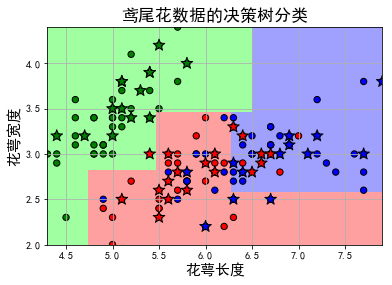

准确度: 75.56%


In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import cross_validation, grid_search

# 花萼长度、花萼宽度，花瓣长度，花瓣宽度
iris_feature_E = 'sepal length', 'sepal width', 'petal length', 'petal width'
iris_feature = u'花萼长度', u'花萼宽度', u'花瓣长度', u'花瓣宽度'
iris_class = 'Iris-setosa', 'Iris-versicolor', 'Iris-virginica'

mpl.rcParams['font.sans-serif'] = [u'SimHei']
mpl.rcParams['axes.unicode_minus'] = False

data = pd.read_csv('data/iris.data', header=None)
x = data[np.arange(4)]
y = pd.Categorical(data[4]).codes

x = x.iloc[:, :2]# 为了可视化，仅使用前两列特征
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.7, random_state=1)

max_depth = np.arange(1, 10)
params_list = dict(max_depth = max_depth)
cv = cross_validation.StratifiedKFold(y_train,4)
# 决策树参数估计
model = grid_search.GridSearchCV(DecisionTreeClassifier(criterion='entropy'), param_grid=params_list, cv = cv)
#使用信息熵来划分子树，gini：使用gini系数划分子树
model.fit(x_train, y_train)
y_test_hat = model.predict(x_test)      # 测试数据
print(model.best_params_)
# 画图
N, M = 50,50 # 横纵各采样多少个值
x1_min, x2_min = x.min()
x1_max, x2_max = x.max()
t1 = np.linspace(x1_min, x1_max, N)
t2 = np.linspace(x2_min, x2_max, M)
x1, x2 = np.meshgrid(t1, t2)  # 生成网格采样点
x_show = np.stack((x1.flat, x2.flat), axis=1)  # 测试点


cm_light = mpl.colors.ListedColormap(['#A0FFA0', '#FFA0A0', '#A0A0FF'])
cm_dark = mpl.colors.ListedColormap(['g', 'r', 'b'])
y_show_hat = model.predict(x_show)  # 预测值
y_show_hat = y_show_hat.reshape(x1.shape)  # 使之与输入的形状相同
plt.figure(facecolor='w')
plt.pcolormesh(x1, x2, y_show_hat, cmap=cm_light)  # 预测值的显示
plt.scatter(x_test[0], x_test[1], c=y_test.ravel(), edgecolors='k', s=150, zorder=10, cmap=cm_dark, marker='*')  # 测试数据
plt.scatter(x[0], x[1], c=y.ravel(), edgecolors='k', s=40, cmap=cm_dark)  # 全部数据
plt.xlabel(iris_feature[0], fontsize=15)
plt.ylabel(iris_feature[1], fontsize=15)
plt.xlim(x1_min, x1_max)
plt.ylim(x2_min, x2_max)
plt.grid(True)
plt.title(u'鸢尾花数据的决策树分类', fontsize=17)
plt.show()

print('准确度: %.2f%%' % (100 * model.score(x_test, y_test)))

#2 使用两特征对鸢尾花进行分类的实现

特征：   花萼长度  +  花萼宽度
	预测正确数目： 123
	准确率: 82.00%


特征：   花萼长度  +  花瓣长度
	预测正确数目： 145
	准确率: 96.67%
特征：   花萼长度  +  花瓣宽度
	预测正确数目： 144
	准确率: 96.00%


特征：   花萼宽度  +  花瓣长度
	预测正确数目： 143
	准确率: 95.33%
特征：   花萼宽度  +  花瓣宽度
	预测正确数目： 145
	准确率: 96.67%


特征：   花瓣长度  +  花瓣宽度
	预测正确数目： 147
	准确率: 98.00%


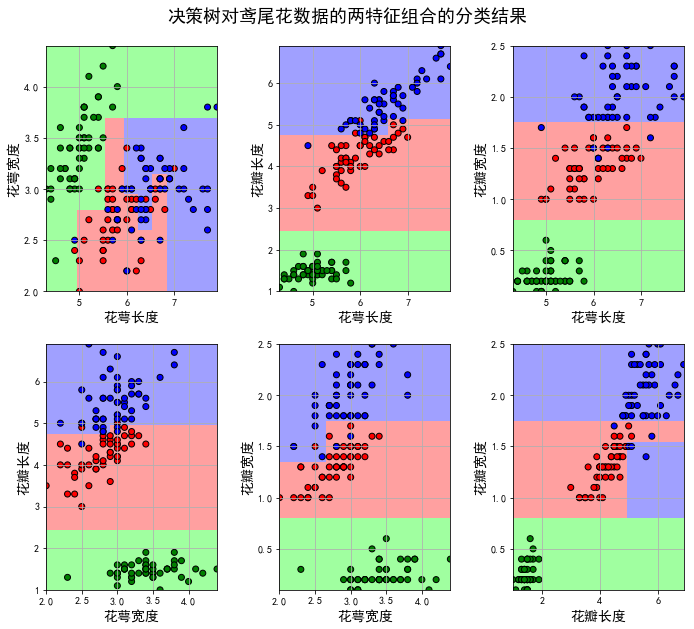

In [3]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier

iris_feature = u'花萼长度', u'花萼宽度', u'花瓣长度', u'花瓣宽度'

mpl.rcParams['font.sans-serif'] = [u'SimHei']  # 黑体 FangSong/KaiTi
mpl.rcParams['axes.unicode_minus'] = False

data = pd.read_csv('data/iris.data', header=None)
x_prime = data[np.arange(4)]
y = pd.Categorical(data[4]).codes

feature_pairs = [[0, 1], [0, 2], [0, 3], [1, 2], [1, 3], [2, 3]]
plt.figure(figsize=(10, 9), facecolor='#FFFFFF')
for i, pair in enumerate(feature_pairs):
    # 准备数据
    x = x_prime[pair]

    # 决策树学习
    clf = DecisionTreeClassifier(criterion='entropy', min_samples_leaf=3)
    clf.fit(x, y)

    # 画图
    N, M = 500, 500  # 横纵各采样多少个值
    x1_min, x2_min = x.min()
    x1_max, x2_max = x.max()
    t1 = np.linspace(x1_min, x1_max, N)
    t2 = np.linspace(x2_min, x2_max, M)
    x1, x2 = np.meshgrid(t1, t2)  # 生成网格采样点
    x_test = np.stack((x1.flat, x2.flat), axis=1)  # 测试点

    # 训练集上的预测结果
    y_hat = clf.predict(x)
    y = y.reshape(-1)
    c = np.count_nonzero(y_hat == y)    # 统计预测正确的个数
    print('特征：  ', iris_feature[pair[0]], ' + ', iris_feature[pair[1]],)
    print('\t预测正确数目：', c,)
    print('\t准确率: %.2f%%' % (100 * float(c) / float(len(y))))

    # 显示
    cm_light = mpl.colors.ListedColormap(['#A0FFA0', '#FFA0A0', '#A0A0FF'])
    cm_dark = mpl.colors.ListedColormap(['g', 'r', 'b'])
    y_hat = clf.predict(x_test)  # 预测值
    y_hat = y_hat.reshape(x1.shape)  # 使之与输入的形状相同
    plt.subplot(2, 3, i+1)
    plt.pcolormesh(x1, x2, y_hat, cmap=cm_light)  # 预测值
    plt.scatter(x[pair[0]], x[pair[1]], c=y, edgecolors='k', cmap=cm_dark)  # 样本
    plt.xlabel(iris_feature[pair[0]], fontsize=14)
    plt.ylabel(iris_feature[pair[1]], fontsize=14)
    plt.xlim(x1_min, x1_max)
    plt.ylim(x2_min, x2_max)
    plt.grid()
plt.suptitle(u'决策树对鸢尾花数据的两特征组合的分类结果', fontsize=18)
plt.tight_layout(2)
plt.subplots_adjust(top=0.92)
plt.show()